# GOES 16


In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot
import numpy as np
from datetime import datetime
from pansat.products.satellite.goes16 import l1b_radiances_all_conus

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
t_0 = datetime(2020, 8, 27, 13, 10)
t_1 = datetime(2020, 8, 27, 13, 15)
files = l1b_radiances_all_conus.download(t_0, t_1)

In [5]:
from satpy import Scene
from glob import glob
 
scn = Scene(reader='abi_l1b', filenames=files)
scn.load(['true_color'])
 
new_scn = scn.resample(scn.min_area(), resampler='native')
new_scn.save_dataset('true_color', filename='hurricane_laura'+'.png')

satpy.scene (WARNING   ) :: The following datasets were not created and may require resampling to be generated: DataID(name='true_color')
/home/simon/build/anaconda3/lib/python3.7/site-packages/satpy/node.py:105: UserWarning: Attribute access to DataIDs is deprecated, use key access instead.
  return self.name == other.name
/home/simon/build/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/home/simon/build/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/home/simon/build/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/simon/build/anaconda3/lib/python3.7/site-packages/satpy/resample.py:925: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))
/home/simon/build/anaconda3/lib/python3.7/site-packages/

In [21]:
lat_min = 25.0
lat_max = 35.0
lon_min = -100.0
lon_max = -90.0

In [13]:
swath= new_scn["true_color"].attrs["area"]
lons, lats = swath.get_lonlats()

In [23]:
inds = np.where((lats > lat_min) * (lats <= lat_max) * (lons > lon_min) * (lons <= lon_max))

In [46]:
i_s, i_e = 1000, 3000
j_e, j_s = 1000, 4000

In [36]:
j_e

1281

In [47]:
from PIL import Image
goes_tc = np.array(Image.open("true_color.png"))

In [41]:
import matplotlib.pyplot as plt

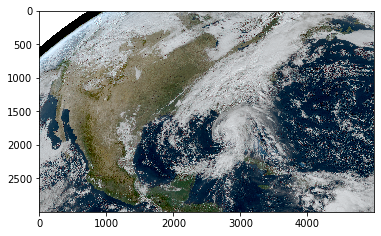

In [48]:
plt.imshow(goes_tc)

In [49]:
from pansat.products.satellite.gpm import l1c_r

ImportError: cannot import name 'l1c_r' from 'pansat.products.satellite.gpm' (/home/simon/src/pansat/pansat/products/satellite/gpm/__init__.py)